<h1>Proyecto 1</h1>

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as F1
from sklearn.metrics import precision_score as PS
from sklearn.metrics import recall_score as RS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.ensemble import RandomForestClassifier

In [2]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8", index_col=0)
df.columns

Index(['text', 'class'], dtype='object')

In [3]:
df.sample(5)

,text,class
Unnamed: 0,,
93171,Grass is just the earths pubic hair Personally...,non-suicide
272353,"Man, I just had the most bizarre dream. One of...",non-suicide
187039,"End my life pleasePlease, my past is haunting me",suicide
36817,"Help me, say something nice pleaseI don't actu...",suicide
289779,My teacher asked what my name was on zoom and ...,non-suicide


In [4]:
df.dtypes

text     object
class    object
dtype: object

In [5]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df['text'] = df['text'].str.replace(".", " ")
df['text'] = df['text'].str.replace("·", " ")
df['text'] = df['text'].str.replace(",", " ")
df['text'] = df['text'].str.replace(";", " ")
df['text'] = df['text'].str.replace(":", " ")
df['text'] = df['text'].str.replace("?", " ")
df['text'] = df['text'].str.replace("¿", " ")
df['text'] = df['text'].str.replace("!", " ")
df['text'] = df['text'].str.replace("¡", " ")
df['text'] = df['text'].str.replace("(", " ")
df['text'] = df['text'].str.replace(")", " ")
df['text'] = df['text'].str.replace("[", " ")
df['text'] = df['text'].str.replace("]", " ")
df['text'] = df['text'].str.replace("{", " ")
df['text'] = df['text'].str.replace("}", " ")
df['text'] = df['text'].str.replace("´", " ")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=28)

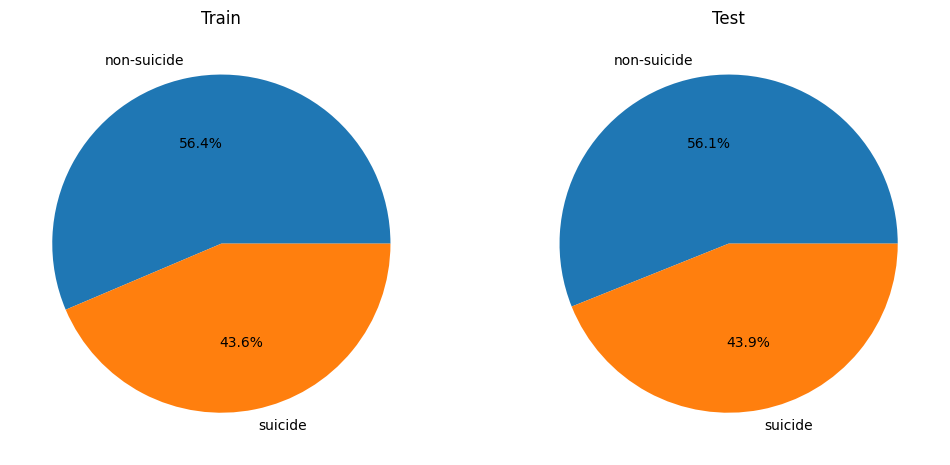

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [8]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.union({'4661', 'meeeeeeeeeeee', 'ja', '01457654035', 'reaally', '3624', '3904512441', 'mesooo', 'ان فرع', ''})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juliana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [10]:
bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_bow = bow.fit_transform(x_train)
x_test_bow = bow.transform(x_test)
len(bow.get_feature_names())

c:\Users\Juliana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


145256

In [11]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
len(tfidf.get_feature_names())

145256

<h3>Random forest usando BoW</h3>

In [12]:
bow_model = RandomForestClassifier(random_state = 2)

In [13]:
bow_model.fit(x_train_bow, y_train)

RandomForestClassifier(random_state=2)

<AxesSubplot: >

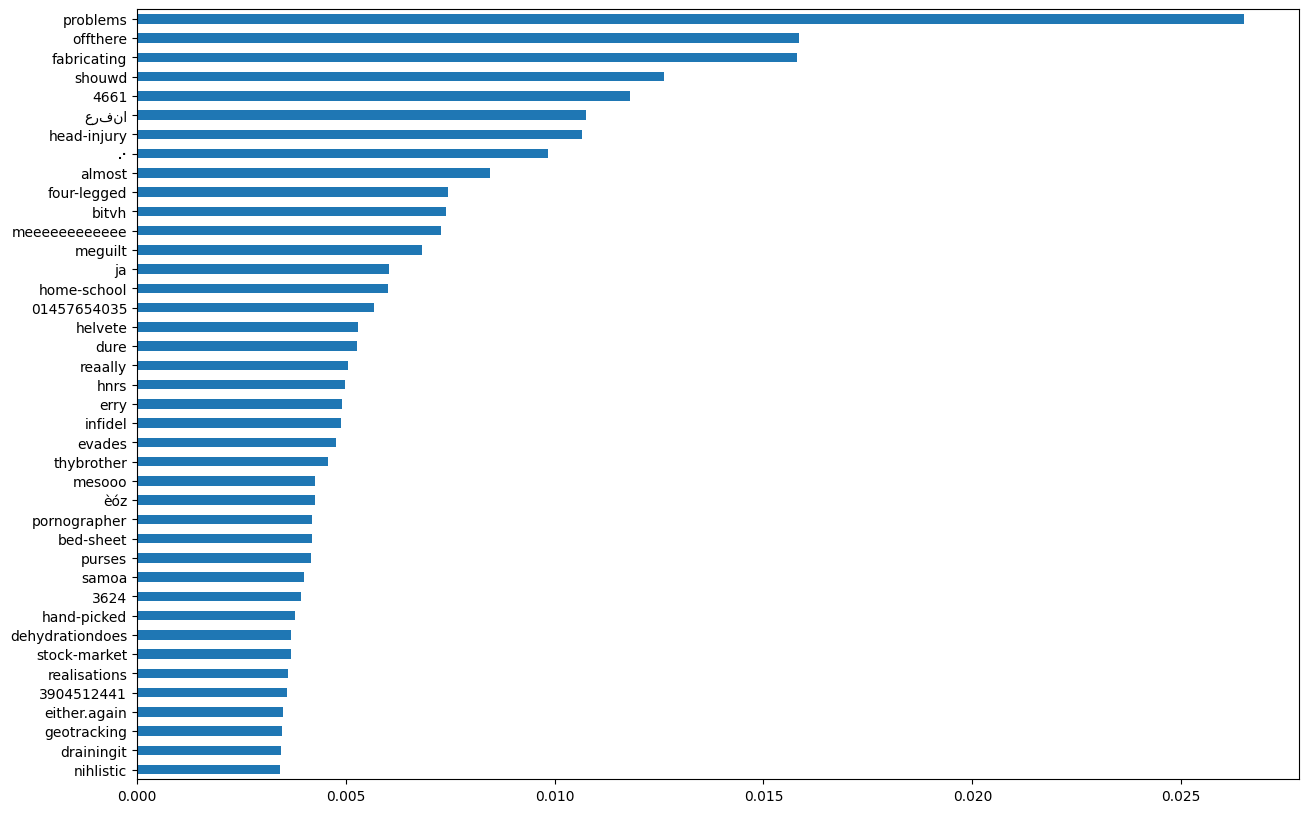

In [14]:
# La 'feature importance' en modelos basados en árboles de decisión indican cuales son las características más importantes al momento de tomar una decisión
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(40).plot.barh(figsize = (15, 10))

In [15]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 1300.21


In [16]:
y_train_bow_predict = bow_model.predict(x_train_bow)
y_test_bow_predict = bow_model.predict(bow.transform(x_test))

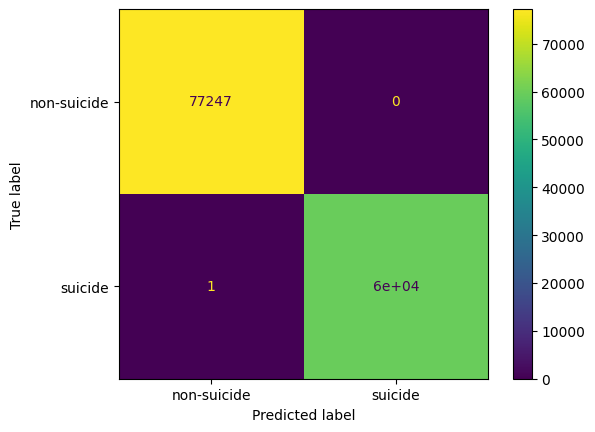

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

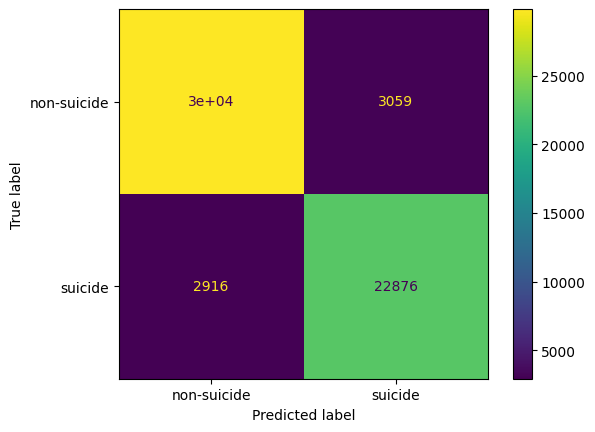

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import pickle

In [20]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 'suicide'))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 'suicide'))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 'suicide'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: 1.0
Recall: 0.9999832616373466
F1: 0.9999916307486295


In [21]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'suicide'))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'suicide'))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'suicide'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: 0.882051282051282
Recall: 0.8869416873449132
F1: 0.8844897249018888


In [50]:
from datetime import datetime
now = datetime.now()
date = now.date()
time = now.time().strftime("%H-%M-%S")

In [51]:
nombre="modelo_dia_"+str(date)+"_hora_"+str(time)+".pkl"
pickle.dump(bow_model,open(nombre,"wb"))

In [23]:
f=open("primermodelo.pkl",'rb')
arbolito = pickle.load(f)
print(arbolito)

RandomForestClassifier(random_state=2)
